<a href="https://colab.research.google.com/github/BMac23/Mat421/blob/main/Section_3_2%2C_3_3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Continuity and Differentiation

## Continuity
A function $f(x)$ is said to be continuous at a point $a$ if the following three conditions are met:
  

*   $f(a)$ is defined.
*   $\lim\limits_{x \to a} f(x)$ exists.
*   $\lim\limits_{x \to a} f(x) = f(a)$.

This means that a function is continuous if there is no interruption in the graph of a function at that point.

## Differentiation

Differentiation is the process of finding the derivative of a function, which measures how the function value changes as its input changes. The derivative of a function $f(x)$ at a point $a$ is defined as:
$f'(a) = \lim\limits_{h \to 0} \frac{f(a + h) - f(a)}{h}$

Where the derivative $f'(x)$ represents the slope of the tangent line to the graph of $f(x)$ at any point $x$


Let's try and make a simple code that creates a derivative:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def derivative(f, a, h = 0.01):
  return (f(a+h)-f(a))/(h)

print(derivative(np.cos,0, h=0.0001))

1.000050001667141


We see that the output should be close to 1 and it's correct (with minor error due to the nature of computers).

Now lets see how it works if we plot the derivative and the actual function at the same time

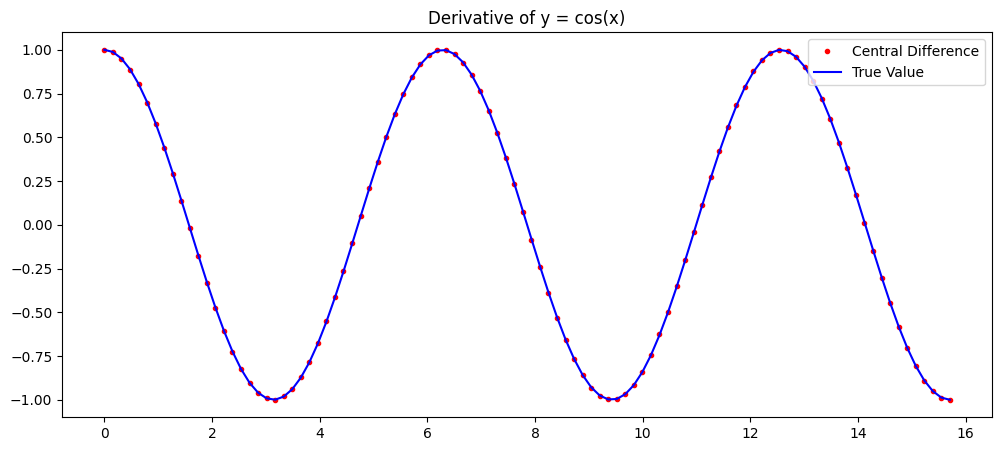

In [10]:
x = np.linspace(0,5*np.pi,100)
dydx = derivative(np.sin,x)

dYdx = np.cos(x)

plt.figure(figsize=(12,5))
plt.plot(x,dydx,'r.',label='Central Difference')
plt.plot(x,dYdx,'b',label='True Value')

plt.title('Derivative of y = cos(x)')
plt.legend(loc='best')
plt.show()

# Taylor Theorem

The Taylor theorem provides a way to approximate a function $f(x)$ near some point $a$ using the derivatives of $f$ at $a$. The Taylor series of a function $f(x)$ that is infinitely differentiable in the neighborhood of a number $a$ is given by:
\begin{equation}
    f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots + \frac{f^{(n)}(a)}{n!}(x-a)^n
\end{equation}

This can also be written in simpler terms as:
\begin{equation}
    f(x) = \sum\limits_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n
\end{equation}
Where $f^{(n)}(a)$ denotes the $n$-th derivative of $f$ at $a$. This series allows us to approximate $f(x)$ by a polynomial, which becomes increasingly accurate as more terms are included.


Let's try to make a function that approximates the mathematical function of $f(x)=e^x$ at $a=0$.

In [11]:
import math

def approximate_exp(x, n_terms):
    sum_series = 0

    for n in range(n_terms):
        term = (x ** n) / math.factorial(n)
        sum_series += term

    return sum_series

In [12]:
# Lets see how close we got:

x_value = 1
n_terms = 10

approximation = approximate_exp(x_value, n_terms)
print(f"Approximation of e^{x_value} using {n_terms} terms of Taylor series: {approximation}")
print(f"Actual value of e^{x_value}: {math.exp(x_value)}")

Approximation of e^1 using 10 terms of Taylor series: 2.7182815255731922
Actual value of e^1: 2.718281828459045


We see that this can be very helpful to approximate more complex functions sometimes in a much easier way

# Optimization with Gradient Descent

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function $f(x)$, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point:

\begin{equation}
    x_{n+1} = x_n - \gamma \nabla f(x_n)
\end{equation}

where:
  * $x_n$ is the current point.
  * $\gamma$ is the step size or learning rate.
  * $\nabla f(x_n)$ is the gradient of $f$ at $x_n$, representing the direction of the steepest ascent.

This is an idea used to find local minimums within some kind of function. This is particularly useful in machine learning models where the function $f(x)$ might be used to describe the error of one of your models given an array of various parameters. Gradient descent would then find the parameters that would give the least amount of error.

For the sake of simplicity, we'll look at the function $f(x) = x^2$


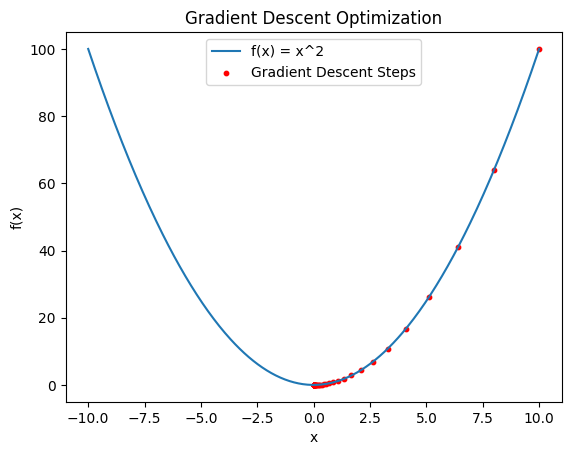

Minimum occurs at: x = 0.00014272476927059603, f(x) = 2.0370359763344873e-08


In [13]:
def gradient_descent(start, learning_rate, num_iterations):
    f = lambda x: x ** 2
    df = lambda x: 2 * x

    x = starting_point
    x_progress = [x]

    for _ in range(num_iterations):
        step = learning_rate * df(x)
        x = x - step
        x_progress.append(x)

    return x, x_progress


starting_point = 10
learning_rate = 0.1
num_iterations = 50

min_x, progress = gradient_descent(starting_point, learning_rate, num_iterations)

x_values = np.linspace(-starting_point, starting_point, 400)
y_values = x_values ** 2
plt.plot(x_values, y_values, label='f(x) = x^2')

progress_y = [x**2 for x in progress]
plt.scatter(progress, progress_y, color='red', marker='o', s=10, label='Gradient Descent Steps')

plt.title('Gradient Descent Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

print(f"Minimum occurs at: x = {min_x}, f(x) = {min_x**2}")

While the example is a little simplistic, it shows the power of being able to optimize finding a function's local minimum and the importance it can have.